# Decision Tree

In [2]:
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mglearn


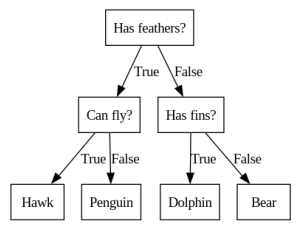

In [4]:
mglearn.plots.plot_animal_tree()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [7]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

accuracy on training set: 1.000
accuracy on test set: 0.937


In [8]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree(lecture 8).dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

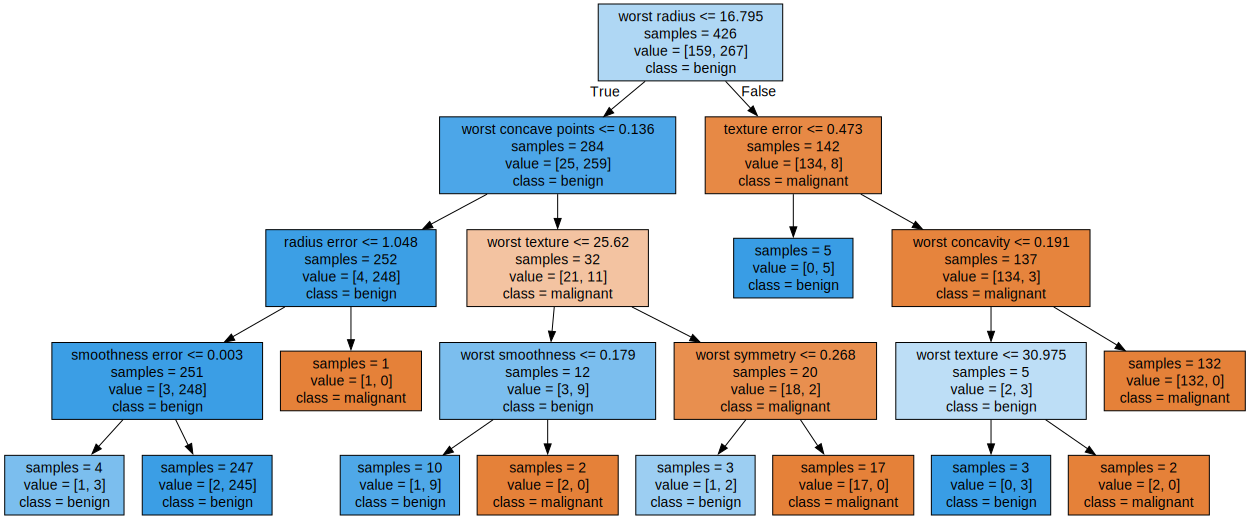

In [10]:
import graphviz

with open("tree(lecture 8).dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [11]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


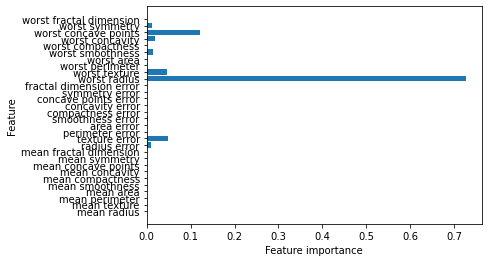

In [14]:

import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)